## Importing Libraries

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt

## Loading the Data

In [7]:
data = pd.read_csv('../data/Cleaned_data.csv', index_col=0)

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

## Fitting the Data
In this section the data will be fitted to three types of models:
1. Logistic Regression
2. Decision Trees
3. Neural Network

Based on the findings from the data analysis that the classes are imbalanced, each technique will be fitted to three data samples:
1. The original data
2. Resampling using Synthetic Minority Oversampling Technique (SMOTE)
3. Resampling using Adaptive Synthetic (ADASYN)

Both the SMOTE and the ADASYN oversampling methods are used to address the problem of imbalanced class - where the one class significantly outnumbers the other. These oversampling methods aim to balance the class distribution.

#### Creating the Samples

In [15]:
X = data.drop('Class',axis=1)
y = data['Class']

##### 1) Original Data

In [18]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y,
                                                    test_size=0.30, 
                                                    random_state=46)

In [20]:
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest,
                                                    test_size=0.50, 
                                                    random_state=46)

In [22]:
len = X.shape[0]
print(f"Train: {X_train.shape[0]}, should be {len*0.7:.2f}. Which is {X_train.shape[0]/len*100:.2f}% of the dataset")
print(f"Val: {X_train.shape[0]}, should be {len*0.15:.2f}.  Which is {X_val.shape[0]/len*100:.2f}% of the dataset")
print(f"Test: {X_test.shape[0]}, should be {len*0.15:.2f}.  Which is {X_test.shape[0]/len*100:.2f}% of the dataset")

Train: 198608, should be 198608.20. Which is 70.00% of the dataset
Val: 198608, should be 42558.90.  Which is 15.00% of the dataset
Test: 42559, should be 42558.90.  Which is 15.00% of the dataset


##### 2) Resampling using SMOTE

In [24]:
X_val2, X_test2, y_val2, y_test2 = X_val, X_test, y_val, y_test

In [26]:
X_train2, y_train2 = SMOTE(random_state=46).fit_resample(X_train, y_train)

In [28]:
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
custom_palette = sns.color_palette('RdBu_r', n_colors=10)
colour1, colour2 = custom_palette[2], custom_palette[8]

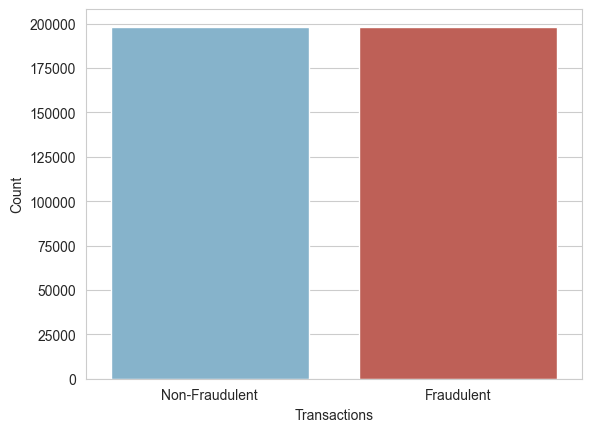

In [30]:
g = sns.countplot(data=pd.DataFrame(y_train2), x='Class', palette=[colour1, colour2])
g.set_ylabel('Count')
g.set_xlabel('Transactions')
g.set_xticklabels(['Non-Fraudulent','Fraudulent'], fontsize=10);

In [32]:
g.figure.savefig('../assets/cnt_plt_classes_SMOTE', dpi=300, bbox_inches='tight')

In [34]:
pd.DataFrame(y_train2).value_counts()

Class
0        198271
1        198271
Name: count, dtype: int64

##### 3) Resampling using ADASYN

In [36]:
X_val3, X_test3, y_val3, y_test3 = X_val, X_test, y_val, y_test

In [38]:
X_train3, y_train3 = ADASYN(random_state=46).fit_resample(X_train, y_train)

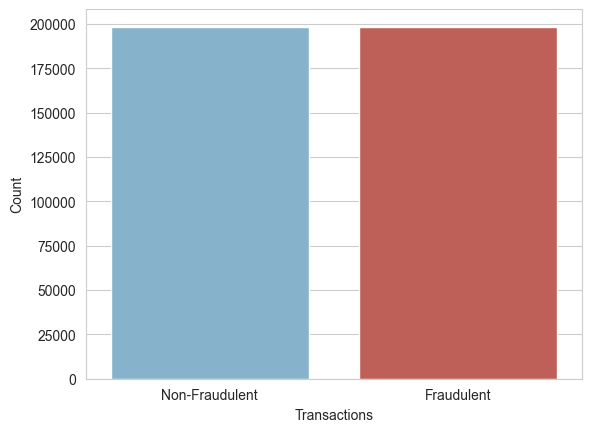

In [40]:
f = sns.countplot(data=pd.DataFrame(y_train3), x='Class', palette=[colour1, colour2])
f.set_ylabel('Count')
f.set_xlabel('Transactions')
f.set_xticklabels(['Non-Fraudulent','Fraudulent'], fontsize=10);

In [42]:
f.figure.savefig('../assets/cnt_plt_classes_ADASYN', dpi=300, bbox_inches='tight')

In [44]:
pd.DataFrame(y_train3).value_counts()

Class
1        198367
0        198271
Name: count, dtype: int64

<br/><br/><br/><br/>
### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.feature_selection import RFE, SelectFromModel
import statsmodels.api as sm

#### Functions

In [303]:
def optimum_threshold(predicted_proba, y_val, step_factor = 0.05, threshold_value = 0.1, f1=0, thrsh_score=0):
    ''' Returns the optimum threshold value and the F1 score for the threshold value '''
    while threshold_value <=1:
        temp_thresh = threshold_value
        predicted = (predicted_proba >= temp_thresh).astype('int')
        if f1<f1_score(y_val, predicted):
            f1 = f1_score(y_val, predicted)
            thrsh_score = threshold_value
        threshold_value = threshold_value + step_factor
    return thrsh_score,f1        

In [469]:
def feature_selection(x_train, y_train, x_val, y_val, features):
    ''' Determines the AUC and Optimum F1 score for a logistic regression model for each number of features '''
    lg = LogisticRegression(max_iter=10000).fit(x_train, y_train)
    roc = []
    f1 = []
    
    for parm in range(1,features+1):
        smf = SelectFromModel(lg, threshold=-np.inf, max_features=parm)
        smf.fit(x_train, y_train)
        feature_idx =smf.get_support()
        feature_name = x_train.columns[feature_idx]
        
        logreg = LogisticRegression(max_iter=10000)
        logreg.fit(x_train[feature_name], y_train)
        
        y_pred_proba = logreg.predict_proba(x_val[feature_name])[::,1]
        auc = roc_auc_score(y_val, y_pred_proba)
        roc.append(auc)
    
        thres, f1score = optimum_threshold(y_pred_proba, y_val)
        f1.append(f1score)
        print(f"Number of Features: {parm}, AUC: {auc}, F1 Score: {f1score}, Optimum Threshold: {thres}")

    return (roc, f1)


In [67]:
def new_predict(function, x, thres):
    pred = function.predict_proba(x)[::,1]
    predictions = (pred > thres).astype('int32')
    return predictions

#### Logistic Regression Without Resampling

In [134]:
roc, f1 = feature_selection(X_train, y_train, X_val, y_val, X_train.shape[1])

Number of Features: 1, AUC: 0.8950525163114127, F1 Score: 0.27522935779816515, Optimum Threshold: 0.1
Number of Features: 2, AUC: 0.8907221875359073, F1 Score: 0.29473684210526313, Optimum Threshold: 0.39999999999999997
Number of Features: 3, AUC: 0.8889709516340485, F1 Score: 0.2978723404255319, Optimum Threshold: 0.44999999999999996
Number of Features: 4, AUC: 0.8845499462169844, F1 Score: 0.29473684210526313, Optimum Threshold: 0.39999999999999997
Number of Features: 5, AUC: 0.9508819860814817, F1 Score: 0.6825396825396826, Optimum Threshold: 0.15000000000000002
Number of Features: 6, AUC: 0.9548627598647187, F1 Score: 0.6976744186046512, Optimum Threshold: 0.1
Number of Features: 7, AUC: 0.9574498129015556, F1 Score: 0.7401574803149606, Optimum Threshold: 0.1
Number of Features: 8, AUC: 0.9592771894947997, F1 Score: 0.7301587301587301, Optimum Threshold: 0.1
Number of Features: 9, AUC: 0.9595938655521514, F1 Score: 0.7500000000000001, Optimum Threshold: 0.1
Number of Features: 10, 

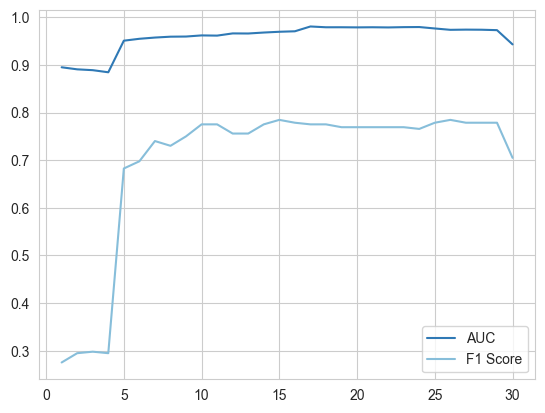

In [135]:
scores = pd.DataFrame({'AUC':roc,'F1 Score':f1},index=range(1,31))
scores.plot();

In [136]:
print(f"Max AUC: {scores['AUC'].max()} with {scores['AUC'].idxmax()} features")
print(f"Max F1 Score: {scores['F1 Score'].max()} with {scores['F1 Score'].idxmax()} features")

Max AUC: 0.9807118324018789 with 17 features
Max F1 Acore: 0.7846153846153845 with 15 features


In [140]:
logmod1 = LogisticRegression(max_iter=10000)
smf = SelectFromModel(logmod1, threshold=-np.inf, max_features=15)
smf.fit(X_train, y_train)
feature_idx =smf.get_support()
feature_name = X_train.columns[feature_idx]
logmod1.fit(X_train[feature_name], y_train)

LogisticRegression(max_iter=10000)

In [240]:
predictions_lgtest1 = new_predict(logmod1, X_test[feature_name], 0.1)
f1_logmod1 = f1_score(y_test, predictions_lgtest1)

In [250]:
print('Logistic Regression \n')
print(f"F1 Score: {f1_logmod1:.5f}")
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions_lgtest1))
print('\n')
print(classification_report(y_test, predictions_lgtest1))

Logistic Regression 

F1 Score: 0.79104

Confusion Matrix:
[[42478    13]
 [   15    53]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.80      0.78      0.79        68

    accuracy                           1.00     42559
   macro avg       0.90      0.89      0.90     42559
weighted avg       1.00      1.00      1.00     42559



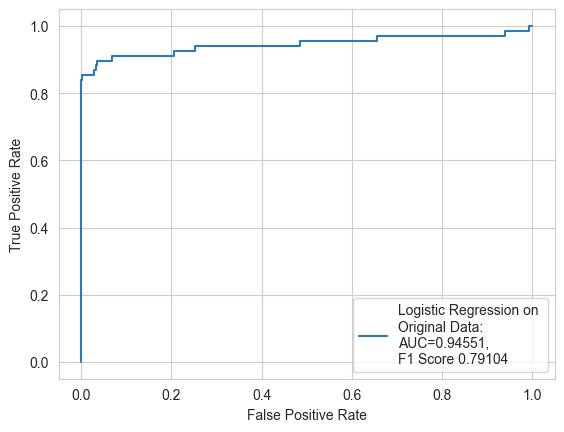

In [260]:
y_pred_proba = logmod1.predict_proba(X_test[feature_name])[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label=f"Logistic Regression on \nOriginal Data: \nAUC={auc:.5f},\nF1 Score {f1_logmod1:.5f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('../assets/ROC_CURVE_logmod1.png')
plt.show()

#### Logistic Regression with SMOTE Resampling

In [266]:
roc2, f12 = feature_selection(X_train2, y_train2, X_val2, y_val2, X_train2.shape[1])

Number of Features: 1, AUC: 0.9499046164793375, F1 Score: 0.48, Optimum Threshold: 0.9500000000000003
Number of Features: 2, AUC: 0.9640193701918884, F1 Score: 0.509090909090909, Optimum Threshold: 0.9500000000000003
Number of Features: 3, AUC: 0.9640626319483572, F1 Score: 0.5549738219895288, Optimum Threshold: 0.9500000000000003
Number of Features: 4, AUC: 0.9645800425557246, F1 Score: 0.5463917525773196, Optimum Threshold: 0.9500000000000003
Number of Features: 5, AUC: 0.966469369984232, F1 Score: 0.6751592356687898, Optimum Threshold: 0.9500000000000003
Number of Features: 6, AUC: 0.9593304879787692, F1 Score: 0.7260273972602739, Optimum Threshold: 0.9500000000000003
Number of Features: 7, AUC: 0.9722546781532975, F1 Score: 0.6790123456790124, Optimum Threshold: 0.9500000000000003
Number of Features: 8, AUC: 0.9728807622929145, F1 Score: 0.6626506024096385, Optimum Threshold: 0.9500000000000003
Number of Features: 9, AUC: 0.9750142590749322, F1 Score: 0.6962025316455697, Optimum Th

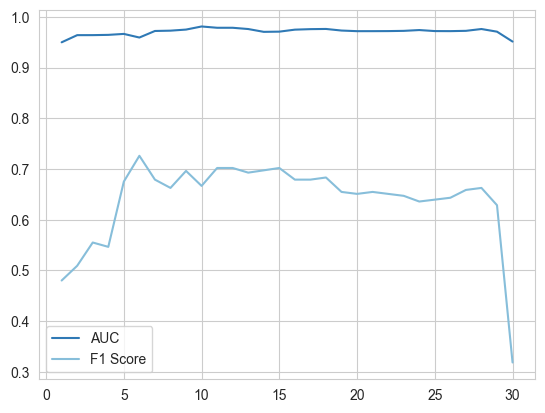

In [267]:
scores_smote = pd.DataFrame({'AUC':roc2,'F1 Score':f12},index=range(1,31))
scores_smote.plot();

In [268]:
print(f"Max AUC: {scores_smote['AUC'].max()} with {scores_smote['AUC'].idxmax()} features")
print(f"Max F1 Acore: {scores_smote['F1 Score'].max()} with {scores_smote['F1 Score'].idxmax()} features")

Max AUC: 0.9811307792515231 with 10 features
Max F1 Acore: 0.7260273972602739 with 6 features


In [280]:
logmod2 = LogisticRegression(max_iter=10000)
smf2 = SelectFromModel(logmod2, threshold=-np.inf, max_features=6)
smf2.fit(X_train2, y_train2)
feature_idx2 =smf2.get_support()
feature_name2 = X_train2.columns[feature_idx2]
logmod2.fit(X_train2[feature_name2], y_train2)

LogisticRegression(max_iter=10000)

In [282]:
predictions_lgtest2 = new_predict(logmod2, X_test2[feature_name2], 0.9500000000000003)
f1_logmod2 = f1_score(y_test2, predictions_lgtest2)

In [284]:
print('Logistic Regression with SMOTE Resampling \n')
print(f"F1 Score: {f1_logmod2:.5f}")
print('\nConfusion Matrix:')
print(confusion_matrix(y_test2, predictions_lgtest2))
print('\n')
print(classification_report(y_test2, predictions_lgtest2))

Logistic Regression with SMOTE Resampling 

F1 Score: 0.73548

Confusion Matrix:
[[42461    30]
 [   11    57]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.66      0.84      0.74        68

    accuracy                           1.00     42559
   macro avg       0.83      0.92      0.87     42559
weighted avg       1.00      1.00      1.00     42559



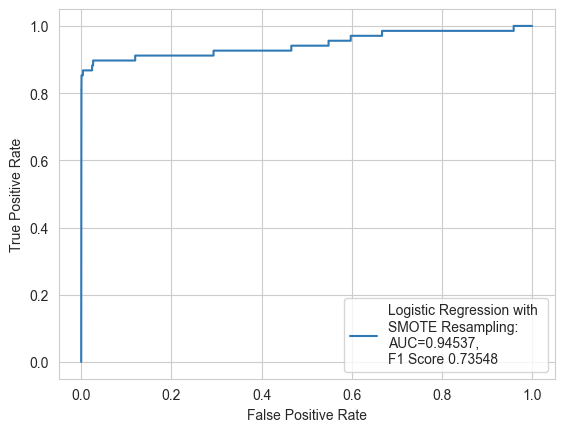

In [289]:
y_pred_proba2 = logmod2.predict_proba(X_test2[feature_name2])[::,1]
fpr2, tpr2, _ = roc_curve(y_test2,  y_pred_proba2)
auc2 = roc_auc_score(y_test2, y_pred_proba2)
plt.plot(fpr2,tpr2,label=f"Logistic Regression with \nSMOTE Resampling: \nAUC={auc2:.5f},\nF1 Score {f1_logmod2:.5f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('../assets/ROC_CURVE_logmod2.png')
plt.show()

#### Logistics Regression with ADASYN Resampling

In [288]:
roc3, f13 = feature_selection(X_train3, y_train3, X_val3, y_val3, X_train3.shape[1])

Number of Features: 1, AUC: 0.9499046164793375, F1 Score: 0.46956521739130425, Optimum Threshold: 0.9500000000000003
Number of Features: 2, AUC: 0.9634379321849472, F1 Score: 0.5380710659898478, Optimum Threshold: 0.9500000000000003
Number of Features: 3, AUC: 0.9640501725624941, F1 Score: 0.5380710659898478, Optimum Threshold: 0.9500000000000003
Number of Features: 4, AUC: 0.9747458631377994, F1 Score: 0.5326633165829145, Optimum Threshold: 0.9500000000000003
Number of Features: 5, AUC: 0.9716760088987703, F1 Score: 0.522167487684729, Optimum Threshold: 0.9500000000000003
Number of Features: 6, AUC: 0.9701592517169726, F1 Score: 0.5326633165829145, Optimum Threshold: 0.9500000000000003
Number of Features: 7, AUC: 0.977848423264719, F1 Score: 0.6586826347305389, Optimum Threshold: 0.9500000000000003
Number of Features: 8, AUC: 0.9750570016903234, F1 Score: 0.6470588235294117, Optimum Threshold: 0.9500000000000003
Number of Features: 9, AUC: 0.9751566767772275, F1 Score: 0.6206896551724

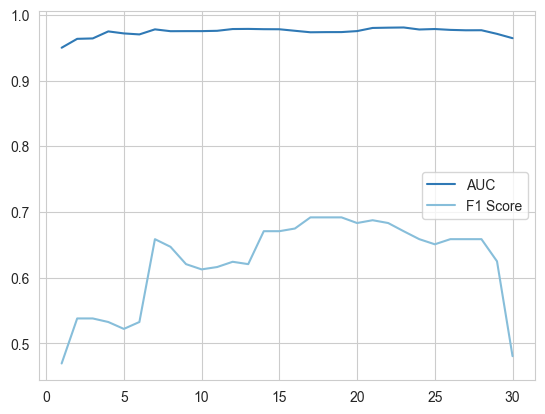

In [292]:
scores_ada = pd.DataFrame({'AUC':roc3,'F1 Score':f13},index=range(1,31))
scores_ada.plot();

In [294]:
print(f"Max AUC: {scores_ada['AUC'].max()} with {scores_ada['AUC'].idxmax()} features")
print(f"Max F1 Acore: {scores_ada['F1 Score'].max()} with {scores_ada['F1 Score'].idxmax()} features")

Max AUC: 0.9807118324018789 with 23 features
Max F1 Acore: 0.6918238993710693 with 17 features


In [296]:
logmod3 = LogisticRegression(max_iter=10000)
smf3 = SelectFromModel(logmod3, threshold=-np.inf, max_features= 19)
smf3.fit(X_train3, y_train3)
feature_idx3 =smf3.get_support()
feature_name3 = X_train3.columns[feature_idx3]
logmod3.fit(X_train3[feature_name3], y_train3)

LogisticRegression(max_iter=10000)

In [298]:
predictions_lgtest3 = new_predict(logmod3, X_test3[feature_name3], 0.9500000000000003)
f1_logmod3 = f1_score(y_test3, predictions_lgtest3)

In [300]:
print('Logistic Regression with ADASYN Resampling \n')
print(f"F1 Score: {f1_logmod3:.5f}")
print('\nConfusion Matrix:')
print(confusion_matrix(y_test3, predictions_lgtest3))
print('\n')
print(classification_report(y_test3, predictions_lgtest3))

Logistic Regression with ADASYN Resampling 

F1 Score: 0.67836

Confusion Matrix:
[[42446    45]
 [   10    58]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.56      0.85      0.68        68

    accuracy                           1.00     42559
   macro avg       0.78      0.93      0.84     42559
weighted avg       1.00      1.00      1.00     42559



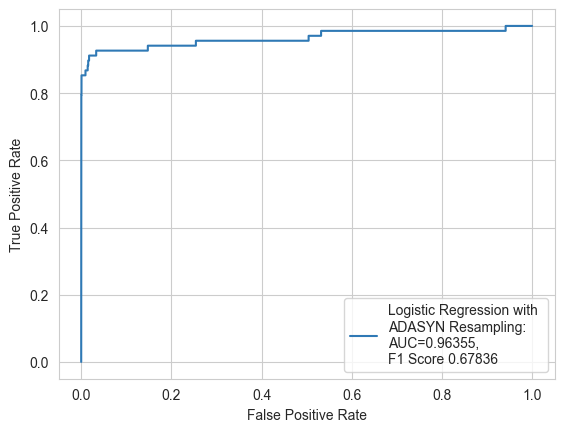

In [302]:
y_pred_proba3 = logmod3.predict_proba(X_test3[feature_name3])[::,1]
fpr3, tpr3, _ = roc_curve(y_test3,  y_pred_proba3)
auc3 = roc_auc_score(y_test3, y_pred_proba3)
plt.plot(fpr3,tpr3,label=f"Logistic Regression with \nADASYN Resampling: \nAUC={auc3:.5f},\nF1 Score {f1_logmod3:.5f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('../assets/ROC_CURVE_logmod3.png')
plt.show()

<br/><br/><br/><br/>
### Decision Trees
Decision trees that use boosting algorithms were used when fitting the data as they deal with bias variance trade-off, unliking bagging/ensembling algorithms which controls high variance in a model. However, a disadvantage of boosting algorithms is that they are prone to overfitting.

When fitting the data a grid search was performed to prevent overfitting by controlling model complexity.

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [53]:
tree = XGBClassifier(eval_metric='logloss', random_state=46)

param_grid = { # This will be used for all samples
    'n_estimators': [100,200,300], # number of sequential trees to be modeled
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10], # maximum depth of the individual regression estimators
    'subsample': [0.5, 0.75, 1]
}

grid_search_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all processors
    verbose=1
)

grid_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=46, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.75, 1]},
             scoring='accuracy', verbose=1)

In [54]:
print("Best Hyperparameters:", grid_search_tree.best_params_)
best_tree = grid_search_tree.best_estimator_

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}


In [69]:
y_pred_proba_val_tree = best_tree.predict_proba(X_val)[::,1]
thres_tree, f1_tree_val = optimum_threshold(y_pred_proba_val_tree, y_val)
print(f"Optimal Threshold: {thres_tree}, F1 Score: {f1_tree_val}")

Optimal Threshold: 0.1, F1 Score: 0.8571428571428571


In [71]:
predictions_tree_test = new_predict(best_tree, X_test, thres_tree)

In [73]:
y_pred_proba_tree = best_tree.predict_proba(X_test)[::,1]
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

f1score_tree = f1_score(y_test, predictions_tree_test)
print(f"AUC: {auc_tree}, F1 Score: {f1score_tree}")

AUC: 0.9834362847772607, F1 Score: 0.8615384615384616


In [79]:
print('Gradient Boosting without Resampling')
print('\nTest Accuracy:', accuracy_score(y_test, predictions_tree_test))
print(f"\nAUC: {auc_tree}\nF1 Score: {f1score_tree}")
print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions_tree_test))
print('\n')
print(classification_report(y_test, predictions_tree_test))

Gradient Boosting without Resampling

Test Accuracy: 0.9995770577316196

AUC: 0.9834362847772607
F1 Score: 0.8615384615384616

Confusion Matrix
[[42485     6]
 [   12    56]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.90      0.82      0.86        68

    accuracy                           1.00     42559
   macro avg       0.95      0.91      0.93     42559
weighted avg       1.00      1.00      1.00     42559



In [495]:
confus = confusion_matrix(y_test, predictions_tree_test)

In [491]:
tn, fp, fn, tp = confus.ravel()
(tn, fp, fn, tp)

(42485, 6, 12, 56)

In [497]:
false_positive = fp/(fp+tn)*100
print(f"{false_positive:.5f}%")

0.01412%


In [499]:
precision = tp/(tp+fp)*100
print(f"{precision:.5f}%")

90.32258%


In [501]:
recall = tp/(tp+fn)*100
print(f"{recall:.5f}%")

82.35294%


In [503]:
F1_Score = 2*((precision/100)*(recall/100))/((precision/100)+(recall/100))
print(f"{F1_Score:.5f}")

0.86154


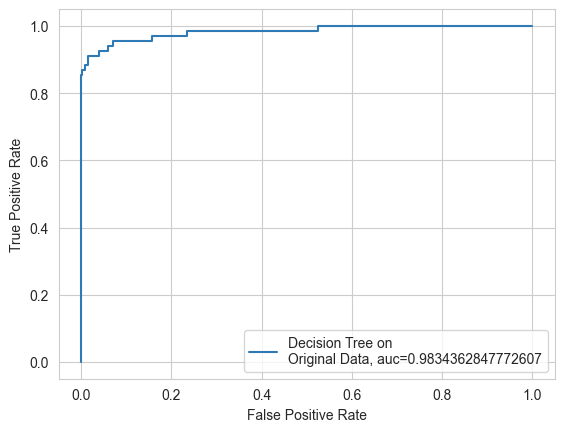

In [81]:
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
plt.plot(fpr_tree,tpr_tree,label="Decision Tree on \nOriginal Data, auc="+str(auc_tree))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('../assets/ROC_CURVE_tree.png')
plt.show()

In [133]:
best_tree.save_model("../assets/best_tree.json")

##### With SMOTE Resampling

In [83]:
tree_smote = XGBClassifier(eval_metric='logloss', random_state=46)

grid_search_tree_smote = GridSearchCV(
    estimator=tree_smote,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all processors
    verbose=1
)

grid_search_tree_smote.fit(X_train2, y_train2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=46, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.75, 1]},
             scoring='accuracy', verbose=1)

In [87]:
print("Best Hyperparameters:", grid_search_tree_smote.best_params_)
best_tree_smote = grid_search_tree_smote.best_estimator_

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}


In [89]:
y_pred_proba_val_tree_SMOTE = best_tree_smote.predict_proba(X_val2)[::,1]
thres_tree_smote, f1_tree_val_smote = optimum_threshold(y_pred_proba_val_tree_SMOTE, y_val2)
print(f"Optimal Threshold: {thres_tree_smote}, F1 Score: {f1_tree_val_smote}")

Optimal Threshold: 0.7500000000000001, F1 Score: 0.8345323741007195


In [95]:
predictions_tree_smote_test = new_predict(best_tree_smote, X_test2, thres_tree_smote)

In [97]:
y_pred_proba_tree_SMOTE = best_tree_smote.predict_proba(X_test2)[::,1]
auc_tree_smote = roc_auc_score(y_test2, y_pred_proba_tree_SMOTE)

f1score_tree_s = f1_score(y_test2, predictions_tree_smote_test)
print(f"AUC: {auc_tree_smote}, F1 Score: {f1score_tree_s}")

AUC: 0.9780784027621073, F1 Score: 0.8484848484848485


In [99]:
print('Gradient Boosting with SMOTE Resampling')
print('\nTest Accuracy:', accuracy_score(y_test2, predictions_tree_smote_test))
print(f"\nAUC: {auc_tree_smote}\nF1 Score: {f1score_tree_s}")
print('\nConfusion Matrix')
print(confusion_matrix(y_test2, predictions_tree_smote_test))
print('\n')
print(classification_report(y_test2, predictions_tree_smote_test))

Gradient Boosting with SMOTE Resampling

Test Accuracy: 0.999530064146244

AUC: 0.9780784027621073
F1 Score: 0.8484848484848485

Confusion Matrix
[[42483     8]
 [   12    56]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.88      0.82      0.85        68

    accuracy                           1.00     42559
   macro avg       0.94      0.91      0.92     42559
weighted avg       1.00      1.00      1.00     42559



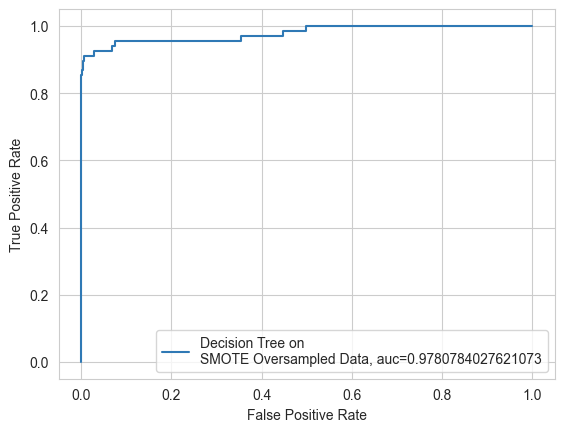

In [101]:
fpr_tree_s, tpr_tree_s, _ = roc_curve(y_test2,  y_pred_proba_tree_SMOTE)
plt.plot(fpr_tree_s,tpr_tree_s,label="Decision Tree on \nSMOTE Oversampled Data, auc="+str(auc_tree_smote))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('../assets/ROC_CURVE_tree_smote.png')
plt.show()

In [129]:
best_tree_smote.save_model("../assets/best_tree_smote.json")

##### With ADASYN Resampling

In [103]:
tree_asa = XGBClassifier(eval_metric='logloss', random_state=46)

grid_search_tree_asa = GridSearchCV(
    estimator=tree_asa,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all processors
    verbose=1
)

grid_search_tree_asa.fit(X_train3, y_train3)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=46, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.75, 1]},
             scoring='accuracy', verbose=1)

In [104]:
print("Best Hyperparameters:", grid_search_tree_asa.best_params_)
best_tree_asa = grid_search_tree_asa.best_estimator_

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}


In [107]:
y_pred_proba_val_tree_asa = best_tree_asa.predict_proba(X_val3)[::,1]
thres_tree_asa, f1_tree_val_asa = optimum_threshold(y_pred_proba_val_tree_asa, y_val3)
print(f"Optimal Threshold: {thres_tree_asa}, F1 Score: {f1_tree_val_asa}")

Optimal Threshold: 0.9500000000000003, F1 Score: 0.8358208955223881


In [109]:
predictions_tree_asa_test = new_predict(best_tree_asa, X_test3, thres_tree_asa)

In [111]:
y_pred_proba_tree_asa = best_tree_asa.predict_proba(X_test3)[::,1]
auc_tree_asa = roc_auc_score(y_test3, y_pred_proba_tree_asa)

f1score_tree_a = f1_score(y_test3, predictions_tree_asa_test)
print(f"AUC: {auc_tree_asa}, F1 Score: {f1score_tree_a}")

AUC: 0.9709634012462156, F1 Score: 0.859375


In [113]:
print('Gradient Boosting with ADASYN Resampling')
print('\nTest Accuracy:', accuracy_score(y_test3, predictions_tree_asa_test))
print(f"\nAUC: {auc_tree_asa}\nF1 Score: {f1score_tree_a}")
print('\nConfusion Matrix')
print(confusion_matrix(y_test3, predictions_tree_asa_test))
print('\n')
print(classification_report(y_test3, predictions_tree_asa_test))

Gradient Boosting with ADASYN Resampling

Test Accuracy: 0.9995770577316196

AUC: 0.9709634012462156
F1 Score: 0.859375

Confusion Matrix
[[42486     5]
 [   13    55]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42491
           1       0.92      0.81      0.86        68

    accuracy                           1.00     42559
   macro avg       0.96      0.90      0.93     42559
weighted avg       1.00      1.00      1.00     42559



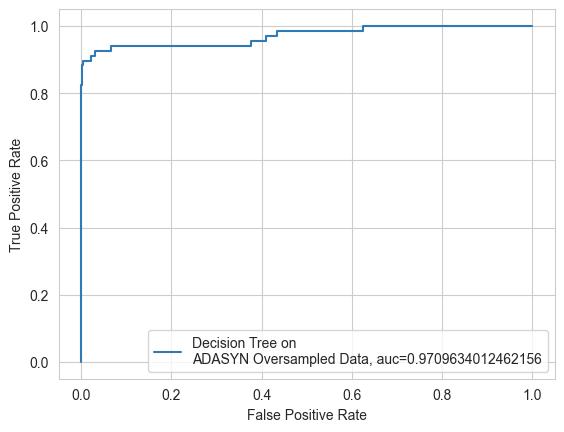

In [117]:
fpr_tree_a, tpr_tree_a, _ = roc_curve(y_test3,  y_pred_proba_tree_asa)
plt.plot(fpr_tree_a,tpr_tree_a,label="Decision Tree on \nADASYN Oversampled Data, auc="+str(auc_tree_asa))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('../assets/ROC_CURVE_tree_ada.png')
plt.show()

In [131]:
best_tree_asa.save_model("../assets/best_tree_asa.json")

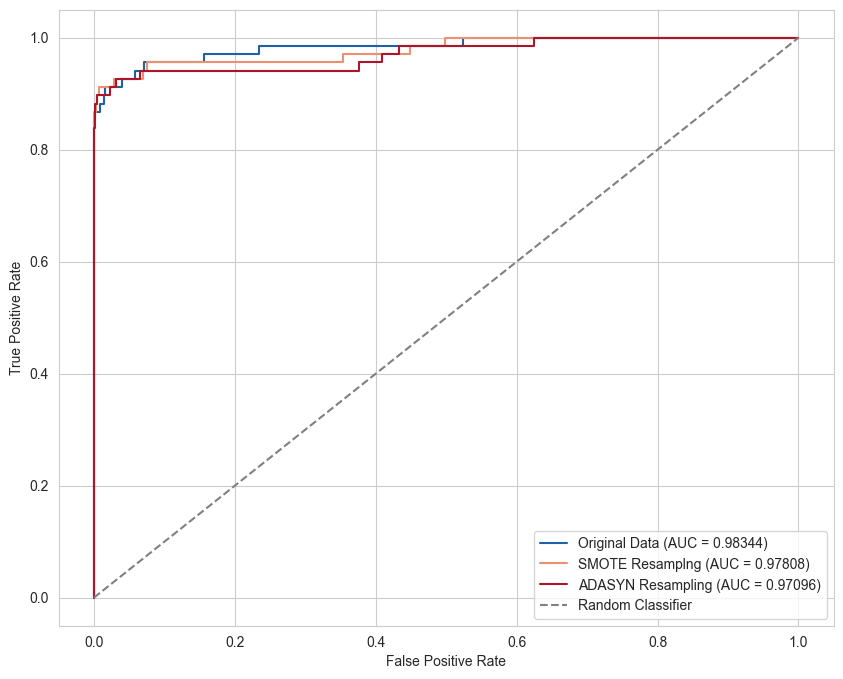

In [517]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_tree, tpr_tree, color = custom_palette[0], label="Original Data (AUC = {:.5f})".format(auc_tree))
plt.plot(fpr_tree_s, tpr_tree_s, color = custom_palette[7] , label="SMOTE Resamplng (AUC = {:.5f})".format(auc_tree_smote))
plt.plot(fpr_tree_a, tpr_tree_a, color = custom_palette[9], label="ADASYN Resampling (AUC = {:.5f})".format(auc_tree_asa))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.savefig('../assets/ROC_CURVE_all_trees.png')
plt.show()

<br/><br/><br/><br/>
### Neural Networks

In [386]:
# Old Import which was not working from 23 Jan 2025 but was working in November 2024
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Activation,Dropout
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import EarlyStopping

In [384]:
# !pip install tf-keras

In [233]:
import tensorflow as tf
import tf_keras as keras
from tf_keras.models import Sequential
from tf_keras.layers import Dense,Activation,Dropout,BatchNormalization
from tf_keras.optimizers import Adam
from tf_keras.callbacks import EarlyStopping

##### Neural Network without Resampling

In [325]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [327]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [329]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_val, y_val), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
6207/6207 [==============================] - 3s 445us/step - loss: 5.5485 - val_loss: 0.1627
Epoch 2/600
6207/6207 [==============================] - 3s 443us/step - loss: 0.3822 - val_loss: 0.0408
Epoch 3/600
6207/6207 [==============================] - 3s 438us/step - loss: 0.0399 - val_loss: 0.0183
Epoch 4/600
6207/6207 [==============================] - 3s 439us/step - loss: 0.0166 - val_loss: 0.0163
Epoch 5/600
6207/6207 [==============================] - 3s 435us/step - loss: 0.0190 - val_loss: 0.0182
Epoch 6/600
6207/6207 [==============================] - 3s 437us/step - loss: 0.0234 - val_loss: 0.0160
Epoch 7/600
6207/6207 [==============================] - 3s 444us/step - loss: 0.0192 - val_loss: 0.0148
Epoch 8/600
6207/6207 [==============================] - 3s 433us/step - loss: 0.0135 - val_loss: 0.0141
Epoch 9/600
6207/6207 [==============================] - 3s 434us/step - loss: 0.0142 - val_loss: 0.0143
Epoch 10/600
6207/6207 [==============================]

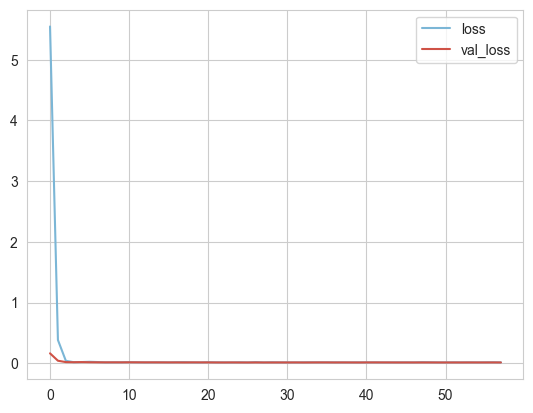

In [330]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(color = [colour1, colour2]);

In [331]:
predict_proba_val_nn = model.predict(X_val).astype('int32')

1330/1330 [==============================] - 0s 247us/step


In [332]:
predict_proba_val_nn.sum()

0

In [333]:
thres_nn, f1_val_nn = optimum_threshold(predict_proba_val_nn, y_val)

In [334]:
print(f"F1 Score on Validation Data: {f1_val_nn}")

F1 Score on Validation Data: 0


In [335]:
predictions_nn_test = (model.predict(X_test) > thres_nn).astype('int32')

1330/1330 [==============================] - 0s 239us/step


In [336]:
predictions_nn_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [337]:
print('Neural Network without Resampling')
print(confusion_matrix(y_test, predictions_nn_test))
print('\n')
print(classification_report(y_test, predictions_nn_test))

Neural Network without Resampling
[[    8 42483]
 [    0    68]]


              precision    recall  f1-score   support

           0       1.00      0.00      0.00     42491
           1       0.00      1.00      0.00        68

    accuracy                           0.00     42559
   macro avg       0.50      0.50      0.00     42559
weighted avg       1.00      0.00      0.00     42559



#### Neural Network with SMOTE Resampling

In [433]:
model_smote = Sequential()
model_smote.add(Dense(units=30,activation='relu'))
model_smote.add(Dropout(0.2))

model_smote.add(Dense(units=15,activation='relu'))
model_smote.add(Dropout(0.2))

model_smote.add(Dense(units=15,activation='relu'))
model_smote.add(Dropout(0.2))

model_smote.add(Dense(units=1,activation='sigmoid'))
model_smote.compile(loss='binary_crossentropy', optimizer='adam')

In [435]:
model_smote.fit(x=X_train2, 
                y=y_train2, 
                epochs=600,
                validation_data=(X_val2, y_val2), verbose=1,
                callbacks=[early_stop]
               )

Epoch 1/600
12392/12392 [==============================] - 6s 477us/step - loss: 29.7687 - val_loss: 0.6877
Epoch 2/600
12392/12392 [==============================] - 6s 477us/step - loss: 0.6978 - val_loss: 0.6942
Epoch 3/600
12392/12392 [==============================] - 6s 462us/step - loss: 0.6970 - val_loss: 0.6920
Epoch 4/600
12392/12392 [==============================] - 6s 462us/step - loss: 0.6983 - val_loss: 0.6879
Epoch 5/600
12392/12392 [==============================] - 6s 460us/step - loss: 0.6956 - val_loss: 0.6915
Epoch 6/600
12392/12392 [==============================] - 6s 455us/step - loss: 0.6943 - val_loss: 0.6942
Epoch 7/600
12392/12392 [==============================] - 6s 451us/step - loss: 0.6935 - val_loss: 0.7056
Epoch 8/600
12392/12392 [==============================] - 6s 470us/step - loss: 0.6972 - val_loss: 0.6957
Epoch 9/600
12392/12392 [==============================] - 6s 467us/step - loss: 0.6949 - val_loss: 0.6924
Epoch 10/600
12392/12392 [==========

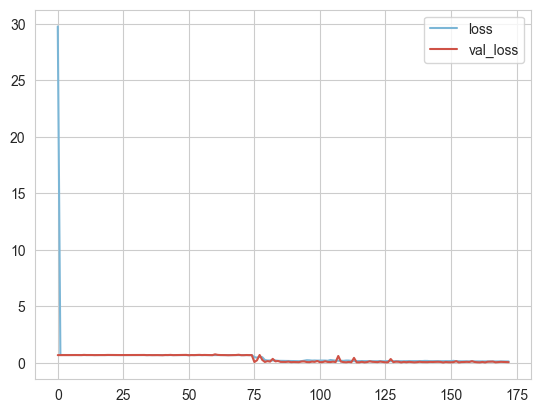

In [436]:
model_loss_smote = pd.DataFrame(model_smote.history.history)
model_loss_smote.plot(color = [colour1, colour2]);

In [437]:
predict_proba_val_nn_smote = model_smote.predict(X_val2).astype('int32')

1330/1330 [==============================] - 0s 249us/step


In [438]:
thres_nn_s, f1_val_nn_s = optimum_threshold(predict_proba_val_nn_smote, y_val2)

In [439]:
print(f"F1 Score on Validation Data: {f1_val_nn_s}, Threshold: {thres_nn_s}")

F1 Score on Validation Data: 0, Threshold: 0


In [440]:
predictions_nn_smote_test = (model_smote.predict(X_test2) > thres_nn_s).astype('int32')

1330/1330 [==============================] - 0s 241us/step


In [447]:
print('Neural Network with SMOTE Resampling')
print(confusion_matrix(y_test2, predictions_nn_smote_test))
print('\n')
print(classification_report(y_test2, predictions_nn_smote_test))

Neural Network with SMOTE Resampling
[[  620 41871]
 [    0    68]]


              precision    recall  f1-score   support

           0       1.00      0.01      0.03     42491
           1       0.00      1.00      0.00        68

    accuracy                           0.02     42559
   macro avg       0.50      0.51      0.02     42559
weighted avg       1.00      0.02      0.03     42559



##### Neural Network with ADASYN Resampling

In [363]:
model_asa = Sequential()
model_asa.add(Dense(units=30,activation='relu'))
model_asa.add(Dropout(0.2))

model_asa.add(Dense(units=15,activation='relu'))
model_asa.add(Dropout(0.2))

model_asa.add(Dense(units=1,activation='sigmoid'))
model_asa.compile(loss='binary_crossentropy', optimizer='adam')

In [365]:
model_asa.fit(x=X_train3,
              y=y_train3,
              epochs=600,
              validation_data=(X_test3, y_test3), verbose=1,
              callbacks=[early_stop]
             )

Epoch 1/600
12395/12395 [==============================] - 5s 414us/step - loss: 29.1548 - val_loss: 0.6926
Epoch 2/600
12395/12395 [==============================] - 5s 408us/step - loss: 0.6997 - val_loss: 0.6977
Epoch 3/600
12395/12395 [==============================] - 5s 420us/step - loss: 0.6942 - val_loss: 0.6987
Epoch 4/600
12395/12395 [==============================] - 5s 407us/step - loss: 0.6955 - val_loss: 0.6866
Epoch 5/600
12395/12395 [==============================] - 5s 413us/step - loss: 0.6955 - val_loss: 0.6950
Epoch 6/600
12395/12395 [==============================] - 5s 409us/step - loss: 0.6941 - val_loss: 0.6924
Epoch 7/600
12395/12395 [==============================] - 5s 408us/step - loss: 0.6934 - val_loss: 0.6832
Epoch 8/600
12395/12395 [==============================] - 5s 409us/step - loss: 0.6963 - val_loss: 0.6950
Epoch 9/600
12395/12395 [==============================] - 5s 431us/step - loss: 0.6936 - val_loss: 0.6941
Epoch 10/600
12395/12395 [==========

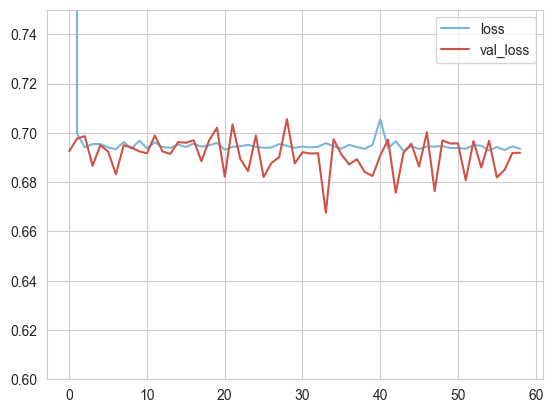

In [371]:
model_loss_asa = pd.DataFrame(model_asa.history.history)
model_loss_asa.plot(ylim=[0.6,0.75],color = [colour1, colour2]);

In [373]:
predict_proba_val_nn_ada = model_asa.predict(X_val3).astype('int32')

1330/1330 [==============================] - 0s 247us/step


In [375]:
thres_nn_a, f1_val_nn_a = optimum_threshold(predict_proba_val_nn_ada, y_val3)

In [377]:
print(f"F1 Score on Validation Data: {f1_val_nn_a}")

F1 Score on Validation Data: 0


In [379]:
predictions_nn_asa_test = (model.predict(X_test3) > thres_nn_a).astype('int32')

1330/1330 [==============================] - 0s 244us/step


In [381]:
print('Neural Network with ADASYN Resampling')
print(confusion_matrix(y_test3, predictions_nn_asa_test))
print('\n')
print(classification_report(y_test3, predictions_nn_asa_test))

Neural Network with ADASYN Resampling
[[    8 42483]
 [    0    68]]


              precision    recall  f1-score   support

           0       1.00      0.00      0.00     42491
           1       0.00      1.00      0.00        68

    accuracy                           0.00     42559
   macro avg       0.50      0.50      0.00     42559
weighted avg       1.00      0.00      0.00     42559



In [88]:
model_asa.save('nn_ada.keras')